In [6]:
from package_project import indicateurs_climat, preparation_data, cartes, indicateurs_tourisme
import pandas

data_1=pandas.read_csv("~/Project/Data/data_climat.csv")
data_2=pandas.read_csv("~/Project/Data/data_tourisme.csv")

df = preparation_data.merge_data(data_1, data_2)

df.DEP.count

<bound method Series.count of 0        1
1        1
2        1
3        1
4        1
        ..
9115    95
9116    95
9117    95
9118    95
9119    95
Name: DEP, Length: 9120, dtype: int64>

- la France est un pays avec une grande variabilité climatique sur le territoire

In [ ]:
# nombre de jours à plus de 30 degrés et 35 degrés  

cartes.carte(indicateurs_climat.nbj_par_an(df, annees = [i for i in range(2011, 2023)], mois = [7, 8], var_climat = "NBJTX30"),
             "NBJTX30",
             "Nombre total de jours", 
             "Nombre de jours >30°")

cartes.carte(indicateurs_climat.nbj_par_an(df, annees = [i for i in range(2011, 2023)], mois = [7, 8], var_climat = "NBJTX35"),
             "NBJTX35",
             "Nombre total de jours", 
             "Nombre de jours >35°")





- tendance au réchauffement, marquée sur les années 2010

In [ ]:
# GIF DE SORO

In [ ]:
# évolution des évènements extremes 

cartes.carte(indicateurs_climat.nbj_evol_2015(df, annees = [i for i in range(2011, 2023)], mois = [7, 8], var_climat = "NBJTX35"),
             "evol_2015",
             "Taux de variation", 
             "Variation moyenne du nombre de jours >35° avant et après 2015")

- le tourisme est une activité qui dépend bcp du climat/météo

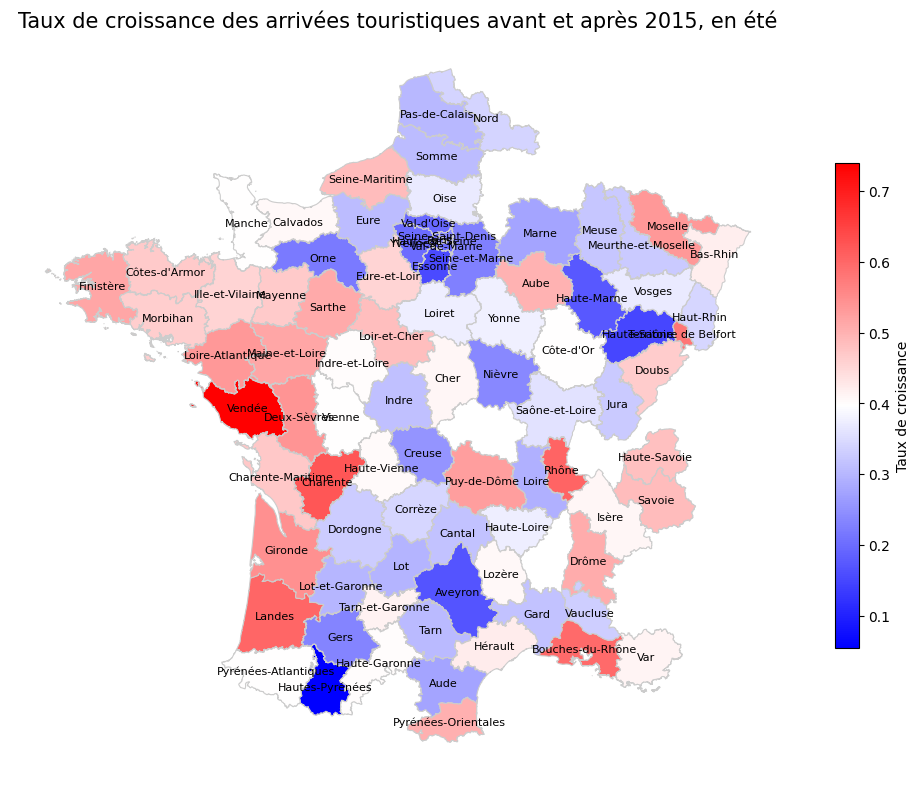

In [3]:


cartes.carte(indicateurs_tourisme.evol_arrivees(df, [7,8]),
              "evol_2015",
              "Taux de croissance", 
              "Taux de croissance des arrivées touristiques avant et après 2015, en été")

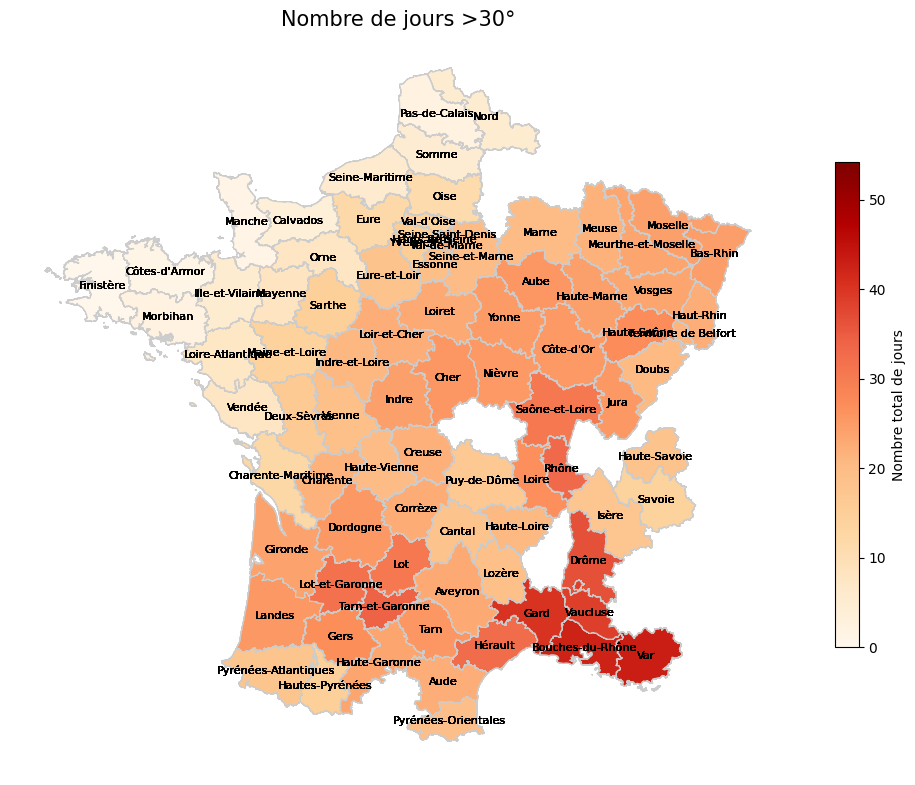

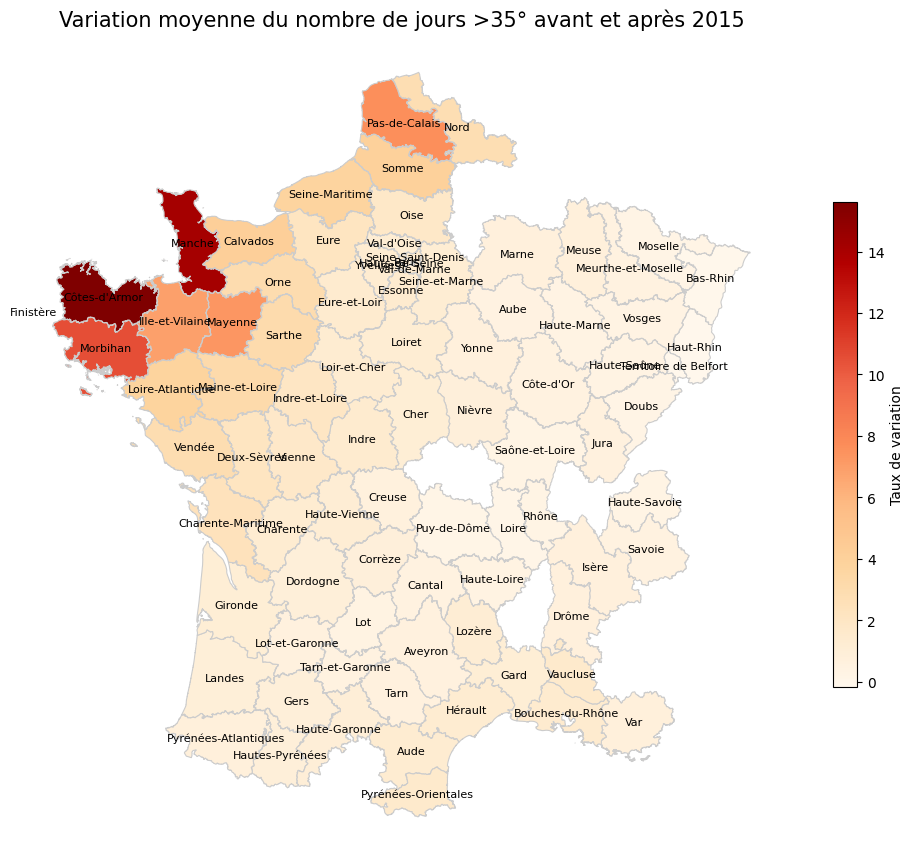

KeyError: False